TensorFlow version: 2.18.0

Trenowanie modelu liniowego:
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 54.6360   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4198
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9213 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7688 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4661 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3796
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3508
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3600 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3337 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3368 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3381 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3522 
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3501 
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3340 
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3483 
E

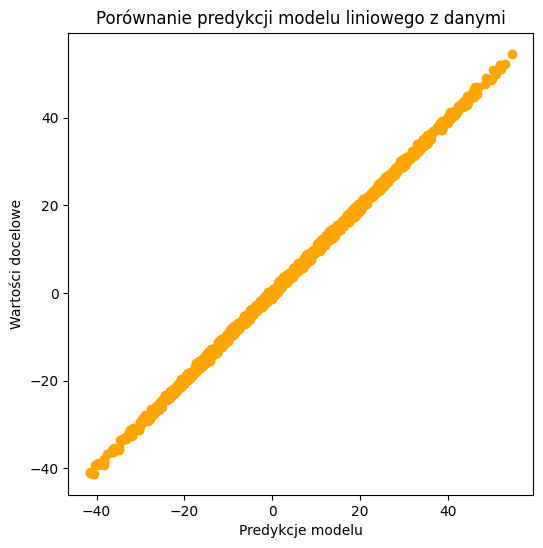


Trenowanie ulepszonego modelu:
Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 427.8467
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 294.4371
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 185.4975
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 126.6980
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 96.7104 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 78.0117
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 77.7739
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 66.2295
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60.6851  
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 56.6385 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 50.5523 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 41.8360
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 48.3939
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33.4682
Epoch 15/100
32/

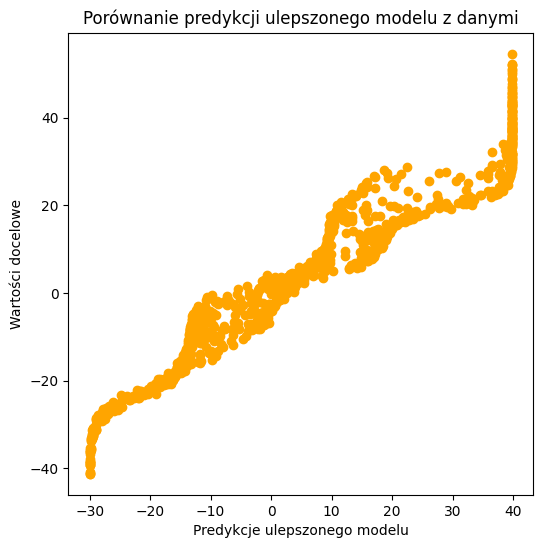

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

data = np.load('TF_dataset.npz')
inputs = data['inputs']
targets = data['targets']

model_lin = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(inputs.shape[1],))
])

model_lin.compile(optimizer='sgd', loss='mean_squared_error')

print("\nTrenowanie modelu liniowego:")
history_lin = model_lin.fit(inputs, targets, epochs=100, verbose=1)

weights_lin = model_lin.layers[0].get_weights()
print("\nWagi modelu liniowego (macierz wag oraz bias):", weights_lin)

predictions_lin = model_lin.predict(inputs).round(1)

plt.figure(figsize=(6, 6))
plt.plot(np.squeeze(predictions_lin), np.squeeze(targets), 'o', color='orange')
plt.xlabel('Predykcje modelu')
plt.ylabel('Wartości docelowe')
plt.title("Porównanie predykcji modelu liniowego z danymi")
plt.show()


model_nl = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation='sigmoid', input_shape=(inputs.shape[1],)),
    tf.keras.layers.Dense(5, activation='sigmoid'),
    tf.keras.layers.Dense(1)
])

model_nl.compile(optimizer='sgd', loss='mean_squared_error')

print("\nTrenowanie ulepszonego modelu:")
history_nl = model_nl.fit(inputs, targets, epochs=100, verbose=1)

predictions_nl = model_nl.predict(inputs)

plt.figure(figsize=(6, 6))
plt.plot(np.squeeze(predictions_nl), np.squeeze(targets), 'o', color='orange')
plt.xlabel('Predykcje ulepszonego modelu')
plt.ylabel('Wartości docelowe')
plt.title("Porównanie predykcji ulepszonego modelu z danymi")
plt.show()
